In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carsforsale/cars_raw.csv


In [2]:
dataset=pd.read_csv("../input/carsforsale/cars_raw.csv")
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [3]:
dataset.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [5]:
#The Price column has , and $ which is a string so we need to clean the data and make it an int datatype
# Replacing , with .
dataset.Price= dataset.Price.str.replace(',','.')

# Disarding the 1st sign (in our case, $)
dataset.Price = dataset.Price.str[1:]

#Dropping rows that have the value of Price as Not Priced and converting to float
dataset.drop(dataset[dataset["Price"]=="ot Priced"].index, inplace=True)
dataset["Price"] = dataset["Price"].astype(float)

#Multiply by 1000 in the Price column to get the price
dataset.Price = dataset.Price.map(lambda x: x*1000)

#displays the Price column
dataset.Price

0       39998.0
1       49985.0
2       41860.0
3       28500.0
4       49000.0
         ...   
9374    27374.0
9375    61998.0
9376    26944.0
9377    28568.0
9378    32091.0
Name: Price, Length: 9374, dtype: float64

In [6]:
#The Used/New column in the dataset has many values with certified by different brands, hence we can replave all those values with certified
dataset['Used/New'] = dataset['Used/New'].apply(lambda x: 'Certified' if 'Certified' in x else x)
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500.0,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [7]:
dataset.Drivetrain = dataset.Drivetrain.apply(lambda x: 'AWD' if 'All' in x else ('FWD' if 'Front' in x else (
                                                                        '4WD' if 'Four' in x else(
                                                                        'RWD' if 'Rear' in x else x))))
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,FWD,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,4WD,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,4WD,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500.0,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,FWD,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,FWD,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,AWD,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,AWD,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,AWD,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,Black,AWD,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [8]:
dataset = dataset[dataset.Drivetrain != '–']
print(dataset['Drivetrain'].unique())

['FWD' '4WD' 'RWD' 'AWD']


In [9]:
#Classify all the fuels as categories and remove columns that don't have a value
dataset['FuelType'].unique()
fuel_dict = {'Gasoline Fuel': 'Gasoline', 'Electric Fuel System': 'Gasoline',
             'E85 Flex Fuel': 'FlexFuel', 'Flex Fuel Capability': 'FlexFuel', 'Flexible Fuel': 'FlexFuel',
             'Plug-In Electric/Gas': 'Hybrid', 'Gasoline/Mild Electric Hybrid': 'Hybrid',
             'Diesel Fuel': 'Diesel'}
dataset = dataset[dataset['FuelType'] != '–']
dataset['FuelType'] = dataset['FuelType'].copy().map(fuel_dict).fillna(dataset['FuelType'])
print(dataset['FuelType'].unique())

['Gasoline' 'FlexFuel' 'Electric' 'Hybrid' 'Diesel']


In [10]:
#The MinMPG and MaxMPG data has some 0s which are not proper for cars so we remove 
dataset = dataset[dataset['MaxMPG'] != 0]
dataset = dataset[dataset['MinMPG'] != 0]
#We can create a new column AverageMPG that averages MinMPG and MaxMPG for the car.
dataset['AverageMPG'] = (dataset['MinMPG'] + dataset['MaxMPG']) / 2
dataset['AverageMPG']

0       23.0
1       21.5
2       18.0
3       32.0
4       23.5
        ... 
9374    30.0
9375    19.5
9376    18.5
9377    29.5
9378    24.0
Name: AverageMPG, Length: 9293, dtype: float64

In [11]:
#We remove DealType NaN values
ratings = ['Great', 'Good', 'Fair']
dataset = dataset[dataset['DealType'].isin(ratings)]
print(dataset['DealType'].unique())

['Great' 'Good' 'Fair']


In [12]:
#There are different types of transmission types so we generalize them into different categories
def trans(x):
    if 'AUTOMATIC' in x or 'Automatic' in x or 'automatic' in x or 'CVT' in x or 'cvt' in x or 'variable' in x or 'Auto' in x or 'auto' in x or 'A/T' in x:
        return 'Automatic'
    if 'M/T' in x or 'manual' in x or 'Manual' in x or 'Dual Shift' in x or 'Double-clutch' in x or 'PDK' in x:
        return 'Manual'
    else:
        return 'Automatic'
    
dataset['Transmission'] = dataset['Transmission'].apply(trans)
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AverageMPG
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,FWD,19,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,4WD,19,24,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,4WD,15,21,Gasoline,Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,FWD,20,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5
5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,RWD,17,23,Gasoline,Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,AWD,27,33,Gasoline,Automatic,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606,30.0
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,AWD,17,22,Hybrid,Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855,19.5
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,AWD,15,22,Gasoline,Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649,18.5
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,AWD,26,33,Gasoline,Automatic,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760,29.5


In [13]:
#Drop columns which have - as transmission value
dataset.drop(dataset[dataset["Transmission"]=='–'].index, inplace=True)
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AverageMPG
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,FWD,19,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,4WD,19,24,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,4WD,15,21,Gasoline,Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,FWD,20,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5
5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,RWD,17,23,Gasoline,Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,AWD,27,33,Gasoline,Automatic,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606,30.0
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,AWD,17,22,Hybrid,Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855,19.5
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,AWD,15,22,Gasoline,Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649,18.5
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,AWD,26,33,Gasoline,Automatic,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760,29.5


In [14]:
def state(x):
    if x == 'Michigan' or x == 'US-12':
        return 'CA'
    elif x == 'US-169':
        return 'OK'
    elif x == 'Glens' or x == 'Bldg' or x == 'Suite':
        return 'NY'
    elif x == 'AZ-101':
        return 'AZ'
    else:
        return x
dataset['State'] = dataset['State'].apply(state)
dataset['State']

0       CA
1       CA
2       CA
4       NV
5       CA
        ..
9374    MA
9375    MA
9376    NH
9377    MA
9378    MA
Name: State, Length: 9074, dtype: object

In [15]:
def color(x):
    if 'red' in x.lower() or 'ruby' in x.lower() or 'lava' in x.lower():
        return 'Red'
    elif 'black' in x.lower() or 'shadow' in x.lower() or 'ebony' in x.lower():
        return 'Black'
    elif 'white' in x.lower() or 'blizzard' in x.lower():
        return 'White'
    elif 'blue' in x.lower() or 'aqua' in x.lower():
        return 'Blue'
    elif 'green' in x.lower() or 'moss' in x.lower() or 'olive' in x.lower():
        return 'Green'
    elif 'brown' in x.lower() or 'bronze' in x.lower() or 'walnut' in x.lower():
        return 'Brown'
    elif 'orange' in x.lower():
        return 'Orange'
    elif 'yellow' in x.lower():
        return 'Yellow'
    elif 'gray' in x.lower() or 'silver' in x.lower() or 'grey' in x.lower() or 'steel' in x.lower() or 'granite' in x.lower() or 'gun' in x.lower() or 'magnetic' in x.lower():
        return 'Gray'
    else:
        return 'Other'
dataset['ExteriorColor'] = dataset['ExteriorColor'].apply(color)
dataset.ExteriorColor

0         Red
1       Black
2        Gray
4       White
5       Black
        ...  
9374     Blue
9375    Black
9376    Black
9377    Black
9378    Black
Name: ExteriorColor, Length: 9074, dtype: object

In [16]:
Q1 = np.percentile(dataset['Price'], 25,interpolation = 'midpoint')
Q3 = np.percentile(dataset['Price'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
outlier =[]
for x in dataset['Price']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('The outliers in the Price column of the dataset are', outlier)
len(outlier)

The outliers in the Price column of the dataset are [106999.0, 71458.0, 84888.0, 86995.0, 71242.0, 71277.0, 73992.0, 77480.0, 81749.0, 72735.0, 72998.0, 74799.0, 74900.0, 82995.0, 73990.0, 72650.0, 71819.0, 75209.0, 72991.0, 76988.0, 78790.0, 78749.0, 74000.0, 77895.0, 86996.0, 88990.0, 82990.0, 72386.0, 78500.0, 94981.0, 127999.0, 77900.0, 72994.0, 78965.0, 75491.0, 79997.0, 73995.0, 74000.0, 78000.0, 119500.0, 99885.0, 83795.0, 84990.0, 71481.0, 75833.0, 71591.0, 83500.0, 77992.0, 96481.0, 73988.0, 71992.0, 81880.0, 78300.0, 90086.0, 85015.0, 99500.0, 71995.0, 72998.0, 73000.0, 71995.0, 90989.0, 71888.0, 83993.0, 91661.0, 87895.0, 82998.0, 219000.0, 71255.0, 135500.0, 104495.0, 72995.0, 73880.0, 90998.0, 78500.0, 91444.0, 268699.0, 74888.0, 84994.0, 72993.0, 71912.0, 73000.0, 72993.0, 76992.0, 73700.0, 81750.0, 71995.0, 72465.0, 91159.0, 73293.0, 88595.0, 76697.0, 77988.0, 85015.0, 81969.0, 75993.0, 79900.0, 74995.0, 97488.0, 76000.0, 145595.0, 71495.0, 76950.0, 83000.0, 72800.0, 129

343

<AxesSubplot:xlabel='Drivetrain', ylabel='Price'>

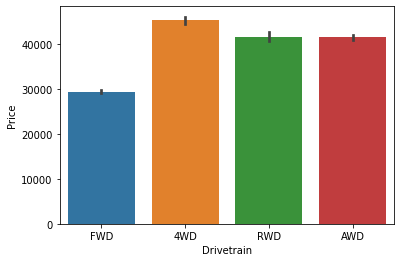

In [17]:
sns.barplot(x="Drivetrain", y="Price", data=dataset)

<AxesSubplot:title={'center':'Car brands'}, ylabel='Make'>

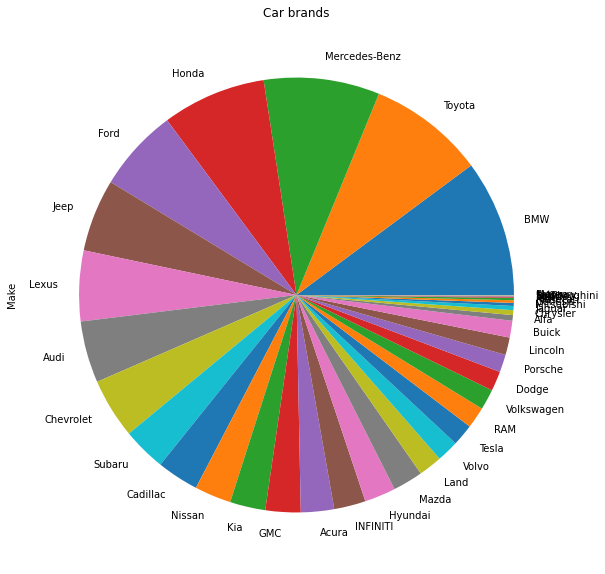

In [18]:
dataset["Make"].value_counts().plot.pie(title = "Car brands", figsize=(10, 10))

<AxesSubplot:xlabel='ConsumerRating', ylabel='Count'>

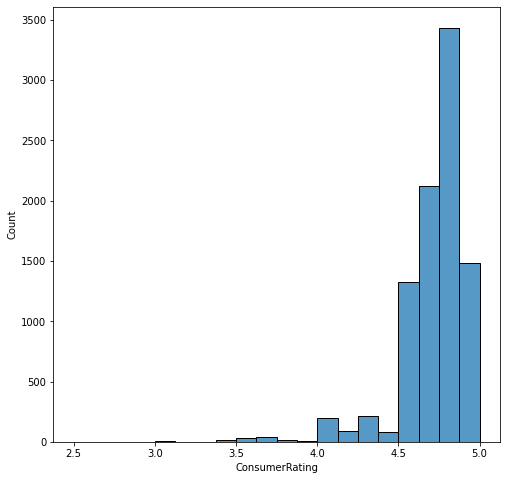

In [19]:
fig = plt.figure(figsize = (8,8))
sns.histplot(dataset['ConsumerRating'], bins = 20)

<AxesSubplot:xlabel='SellerRating', ylabel='Count'>

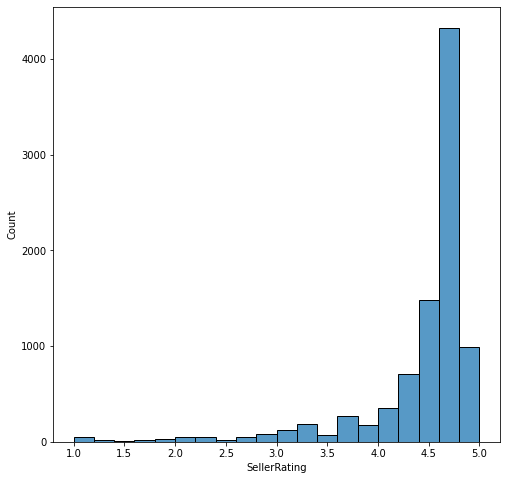

In [20]:
fig = plt.figure(figsize = (8,8))
sns.histplot(dataset['SellerRating'], bins = 20)

<AxesSubplot:>

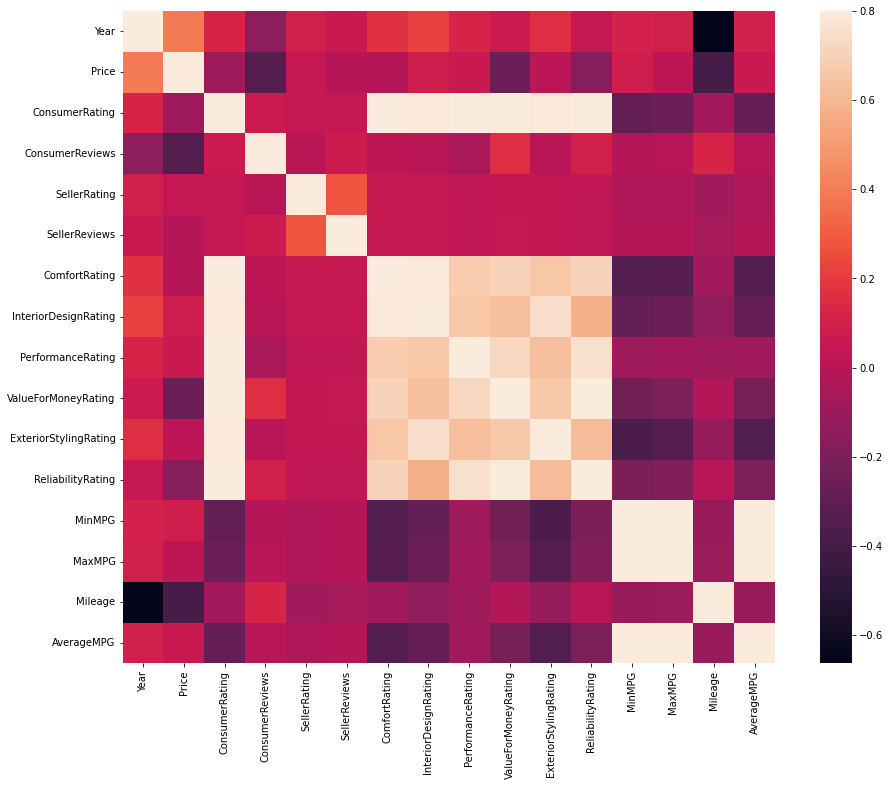

In [21]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(dataset.corr(), square=True, vmax = 0.8)

In [22]:
dataset

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,AverageMPG
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,FWD,19,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,23.0
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,4WD,19,24,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,21.5
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,4WD,15,21,Gasoline,Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,18.0
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,FWD,20,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,23.5
5,2012,Toyota,4Runner SR5,Used,23541.0,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,RWD,17,23,Gasoline,Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,AWD,27,33,Gasoline,Automatic,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606,30.0
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,AWD,17,22,Hybrid,Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855,19.5
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,AWD,15,22,Gasoline,Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649,18.5
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,AWD,26,33,Gasoline,Automatic,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760,29.5
